In [ ]:
from setuptools.command.bdist_egg import safety_flags
!export HF_HUB_OFFLINE=1
!export HF_HUB_DISABLE_TELEMETRY=1

In [22]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "stablediffusionapi/realistic-vision-v51",
    torch_dtype=torch.float16,
    local_files_only=True,
    safety_checker=None,
).to("cuda")


LocalEntryNotFoundError: Cannot find an appropriate cached snapshot folder for the specified revision on the local disk and outgoing traffic has been disabled. To enable repo look-ups and downloads online, pass 'local_files_only=False' as input.

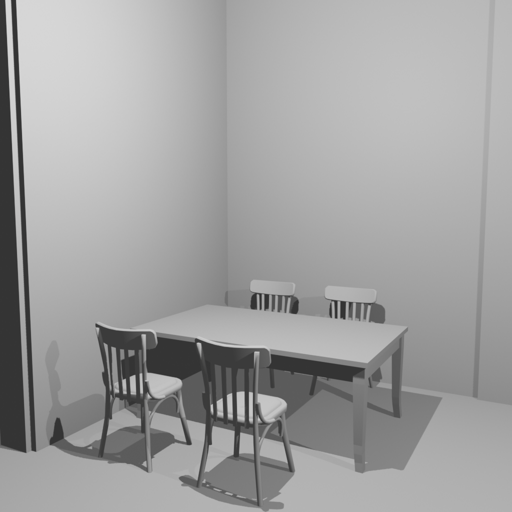

In [8]:
from PIL import Image

image = Image.open("data/sample_images/living_room/0128-0104_4.png").convert("RGB")
image = image.resize((512, 512))

display(image)


In [20]:
prompt = "A elegant mahogany table with handmade gilded chairs, a large crystal chandelier, burgundy walls, same layout and scale, oil paint portraits on the walls"
negative_prompt = "blurry, deformed, watermark, monochrome, different layout"

strength = 0.62  # 0.3-0.8 range for fidelity to original image
guidance = 17  # higher = more prompt fidelity
num_inference_steps = 60
negative_prompt = "blurry, deformed, text, watermark, monochrome"

  0%|          | 0/37 [00:00<?, ?it/s]

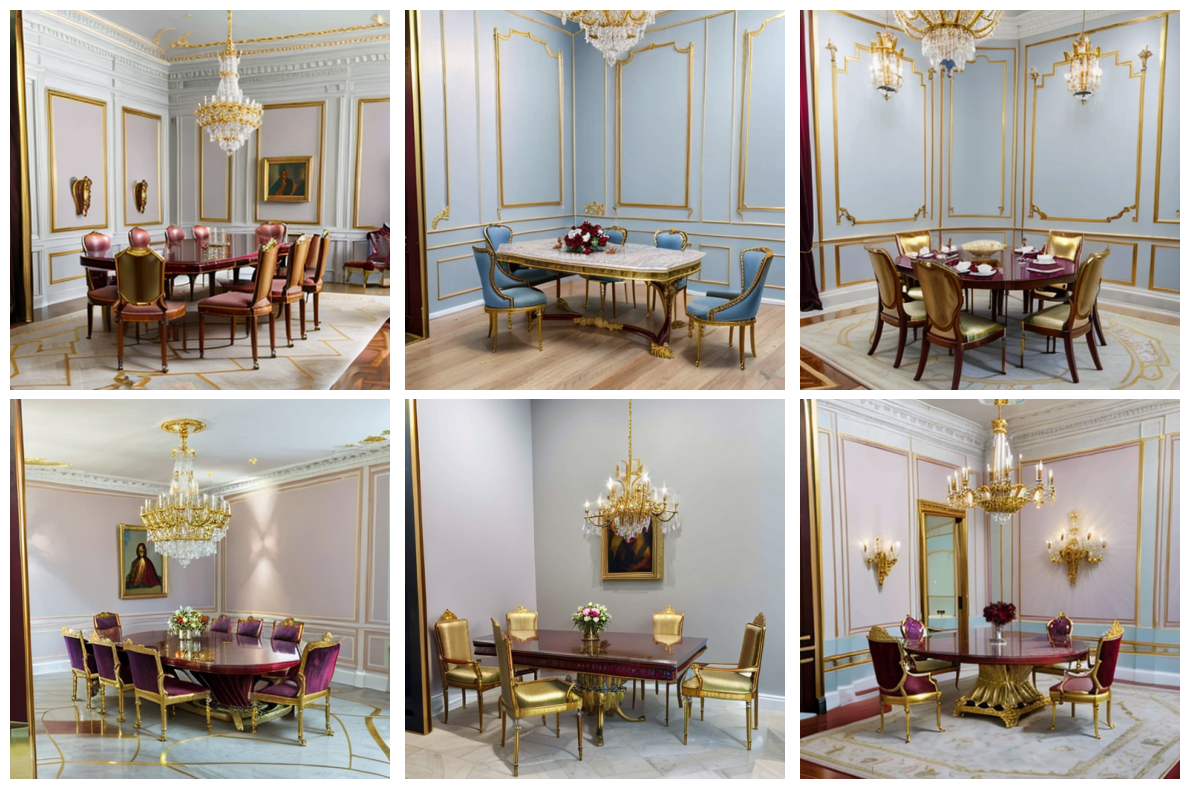

In [21]:
import matplotlib.pyplot as plt

# 1) How many samples you want
num_samples = 6

# 2) Run the pipeline to get a list of PIL images
results = pipe(
    prompt=prompt,
    image=image,
    strength=strength,
    guidance_scale=guidance,
    num_inference_steps=num_inference_steps,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples
).images  # this will be a list of length `num_samples`

# 3) Display in a 2×(num_samples/2) grid
rows = 2
cols = num_samples // rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
for i, img in enumerate(results):
    ax = axes[i // cols, i % cols]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [30]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline, DPMSolverMultistepScheduler, DiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

pipe = DiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V6.0_B1_noVAE")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:

# swap in a fast Karras scheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()
pipe = pipe.to("cuda")

# 2) Prepare your input image
init_image = Image.open("data/sample_images/living_room/0128-0104_4.png").convert("RGB")
init_image = image.resize((512, 512))

  0%|          | 0/60 [00:00<?, ?it/s]

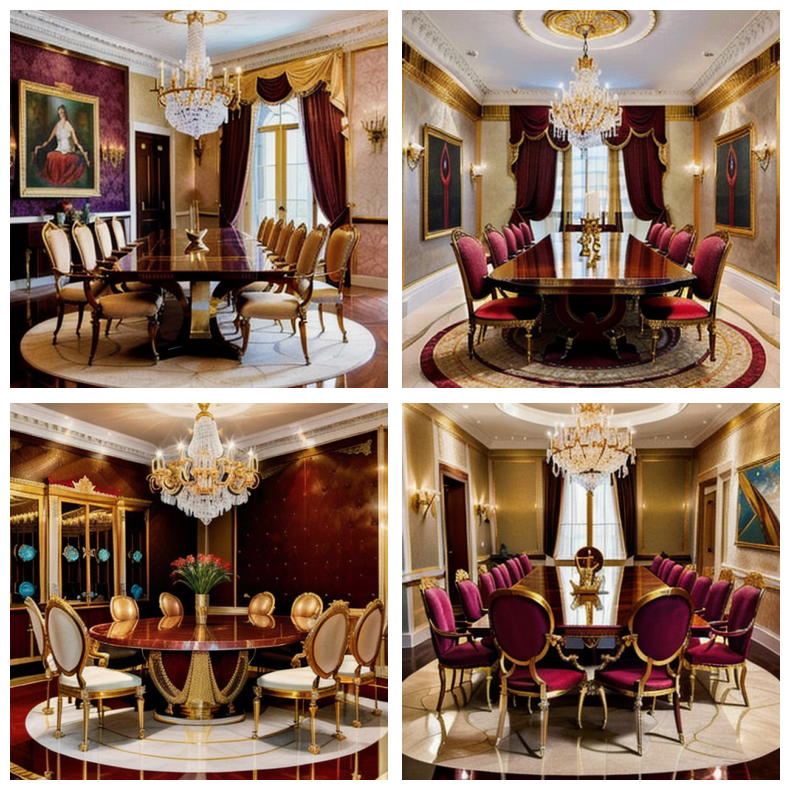

In [32]:

# 3) Set your prompts & generation parameters
prompt = "An elegant mahogany table with handmade gilded chairs, a large crystal chandelier, same layout, oil paint portraits on the walls"
negative_prompt = "blurry, deformed, text, watermark, monochrome"
strength = 0.25          # how much to respect the original image (0.3–0.8)
guidance_scale = 17      # higher = more faithful to the prompt
num_inference_steps = 80
num_samples = 4          # how many images to generate at once

# 4) Run the img2img call
outputs = pipe(
    prompt=prompt,
    image=init_image,
    strength=strength,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples
).images  # this is a list of PIL Images

# 5) Display in a 2×(num_samples/2) grid
rows = 2
cols = num_samples // rows
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
for i, img in enumerate(outputs):
    ax = axes[i//cols, i%cols]
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout()
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/39 [00:00<?, ?it/s]

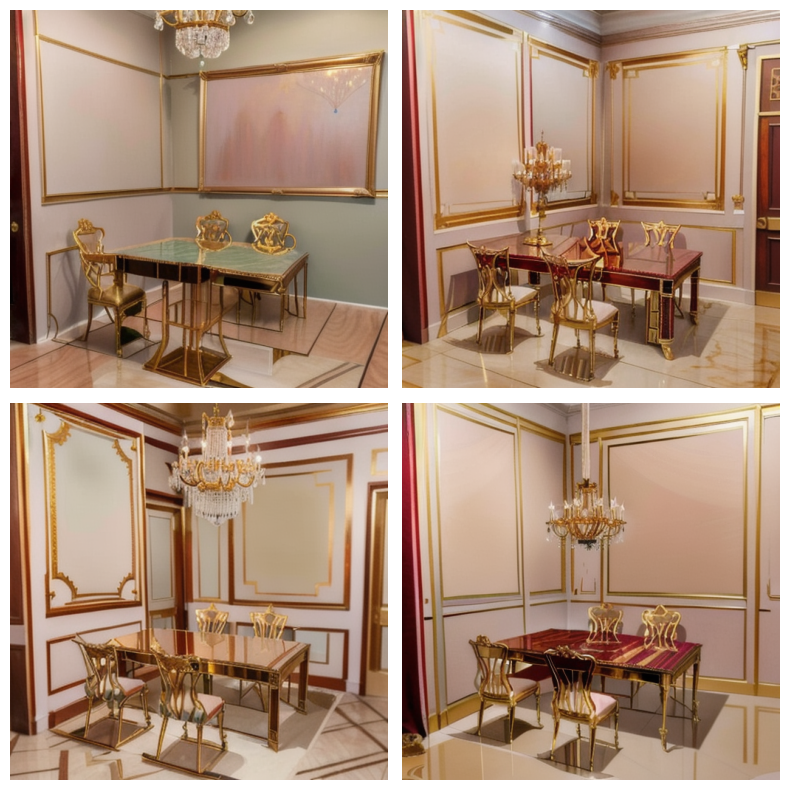

In [46]:
import cv2
from diffusers import (
    StableDiffusionControlNetImg2ImgPipeline,
    ControlNetModel,
    DPMSolverMultistepScheduler, ModelMixin
)
from PIL import Image

# 1) Build a Canny edge map of your init image
init_bgr = cv2.imread("data/sample_images/living_room/0128-0104_4.png")
edges = cv2.Canny(init_bgr, 100, 200)
control_image = Image.fromarray(edges).convert("RGB")
RES = 512
init_image   = init_image.resize((RES, RES))
control_image = control_image.resize((RES, RES))

# 2) Load ControlNet + your Realistic Vision model
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)
pipe_cn = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "SG161222/Realistic_Vision_V6.0_B1_noVAE",
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe_cn.scheduler = DPMSolverMultistepScheduler.from_config(pipe_cn.scheduler.config)
pipe_cn.enable_attention_slicing()
pipe_cn = pipe_cn.to("cuda")

# 3) Run with near-zero strength (just to apply style)
outputs = pipe_cn(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=init_image,
    control_image=control_image,
    strength=0.65,            # very low, just inject style
    guidance_scale=guidance_scale,
    num_inference_steps=60,
    num_images_per_prompt=num_samples
).images

rows = 2
cols = num_samples // rows
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
for i, img in enumerate(outputs):
    ax = axes[i//cols, i%cols]
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout()
plt.show()